## Cvičení z Programování pro fyziky

### Opakování:

Již víme, že jedním ze způsobů, jak vykreslit graf funkce je, že vytvoříme *textový* soubor a ten předhodíme programu pro malování grafů `gnuplot`.

In [ ]:
!apt-get install -q --no-upgrade gnuplot-nox

poté namalujeme kružnici složením několika kroků

- program vytvoří tabulku čísel
- vyrobíme skript pro `gnuplot`
- spustíme jej
- a prohlédneme si výsledný obrázek

Aby bylo na obrázku vidět, jak vzniknul, volíme malý počet bodů "kružnice".

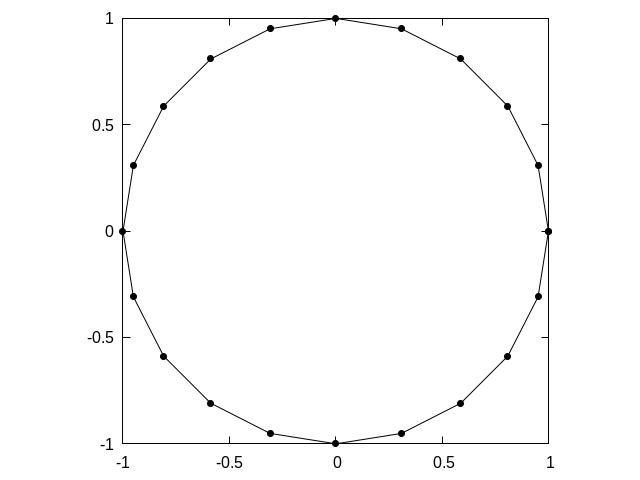

In [ ]:
import math

a = 0
b = 2*math.pi
n = 20

with open("data.txt","w") as f:
  for i in range(0,n+1):
    s = a+(b-a)*i/n
    x = math.cos(s)
    y = math.sin(s)
    print(s, x, y, file=f)

## 2. kód vytvářející skript pro gnuplot

gnuplot_skript = """
set term pngcairo enhanced font "Arial,12.0" # font je nutno specifikovat!
set output "obrazek.png"

set size ratio -1
plot "data.txt" using 2:3 with linespoints pointtype 7 linecolor "black" notitle
"""

with open("prikazy.gp","w") as f:
  print(gnuplot_skript,file=f)

## 3. kód spouštějící gnuplot

!gnuplot prikazy.gp

## 4. kód zobrazující vytvořený obrázek

from PIL import Image
display(Image.open("obrazek.png"))

**Úloha**  V programu se příliš mockrát počítá sin a cos. Upravte program tak, aby s použitím součtových vzorů počítal 1x sinus a 1xkosinus úhlu $\Delta s=(b-a)/n$.

$$
\cos s_{n+1} = \cos s_n ~\cos \Delta s - \sin s_ ~\sin \Delta s
$$
$$
\sin s_{n+1} = \sin s_n ~\cos \Delta s + \cos s_ ~\sin \Delta s
$$

Namalujte znovu obrázek a porovnejte s předchozím

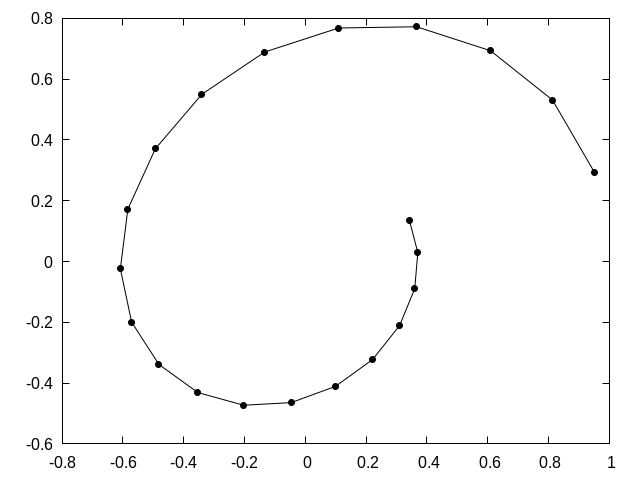

In [ ]:
import math

a = 0
b = 2*math.pi
n = 20

x = 1   #  x ... cos(s)
y = 0   #  y ... sin(s)
s = 0.0
ds = (b-a)/n
cos_ds = math.cos(ds)
sin_ds = math.sin(ds)

with open("data.txt","w") as f:
  for i in range(0,n+1):
    s = s + ds
    x =  x*cos_ds - y*sin_ds
    y =  y*cos_ds + x*sin_ds
    print(s, x, y, file=f)

## 2. kód vytvářející skript pro gnuplot

gnuplot_skript = """
set term pngcairo enhanced font "Arial,12.0" # font je nutno specifikovat!
set output "obrazek.png"

set size ratio -1
plot "data.txt" using 2:3 with linespoints pointtype 7 linecolor "black" notitle
"""

with open("prikazy.gp","w") as f:
  print(gnuplot_skript,file=f)

## 3. kód spouštějící gnuplot

!gnuplot prikazy.gp

## 4. kód zobrazující vytvořený obrázek

from PIL import Image
display(Image.open("obrazek.png"))

Jasně, máme tam chybu, zaponěli jsme zavést pomocnou proměnnou `stare_x`. Potom opravdu dostaneme kružnici (uzavřený n-úhelník).

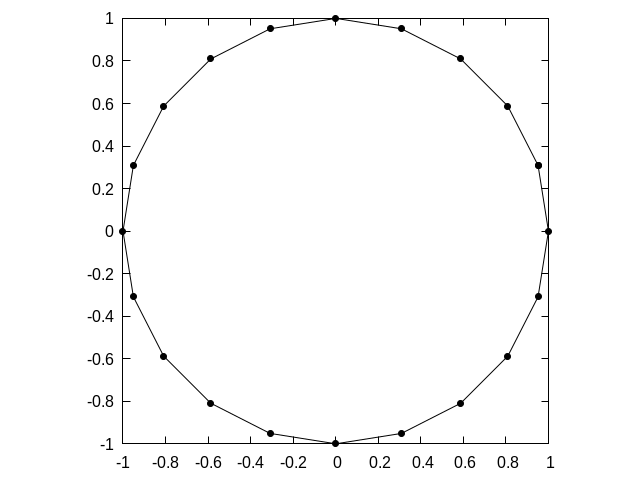

In [ ]:
import math

a = 0
b = 2*math.pi
n = 20

x = 1   #  x ... cos(s)
y = 0   #  y ... sin(s)
s = 0.0
ds = (b-a)/n
cos_ds = math.cos(ds)
sin_ds = math.sin(ds)

with open("data.txt","w") as f:
  for i in range(0,n+1):
    s = s + ds
    stare_x = x
    x =  x*cos_ds - y*sin_ds
    y =  y*cos_ds + stare_x*sin_ds
    print(s, x, y, file=f)

## 2. kód vytvářející skript pro gnuplot

gnuplot_skript = """
set term pngcairo enhanced font "Arial,12.0" # font je nutno specifikovat!
set output "obrazek.png"

set size ratio -1
plot "data.txt" using 2:3 with linespoints pointtype 7 linecolor "black" notitle
"""

with open("prikazy.gp","w") as f:
  print(gnuplot_skript,file=f)

## 3. kód spouštějící gnuplot

!gnuplot prikazy.gp

## 4. kód zobrazující vytvořený obrázek

from PIL import Image
display(Image.open("obrazek.png"))

Stejného výsledku můžeme v Pythonu dosáhnout použitím vícenásobného přiřazení (techn. tuples+unpacking).

In [ ]:
import math

a = 0
b = 2*math.pi
n = 20

x = 1   #  x ... cos(s)
y = 0   #  y ... sin(s)
s = 0.0
ds = (b-a)/n
cos_ds = math.cos(ds)
sin_ds = math.sin(ds)

with open("data.txt","w") as f:
  for i in range(0,n+1):
    s = s + ds
    x, y =  x*cos_ds - y*sin_ds, y*cos_ds + x*sin_ds
    print(s, x, y, file=f)

## 2. kód vytvářející skript pro gnuplot

gnuplot_skript = """
set term pngcairo enhanced font "Arial,12.0" # font je nutno specifikovat!
set output "obrazek.png"

set size ratio -1
plot "data.txt" using 2:3 with linespoints pointtype 7 linecolor "black" notitle
"""

with open("prikazy.gp","w") as f:
  print(gnuplot_skript,file=f)

## 3. kód spouštějící gnuplot

!gnuplot prikazy.gp

## 4. kód zobrazující vytvořený obrázek

from PIL import Image
display(Image.open("obrazek.png"))

**Úloha**  Připomeňme si, že již umíme psát funkce.

Napište funkci `next_cossin(cos, sin, cos_ds, sin_ds)`, která dovolí psát program výše s pomocí cyklu
```python
for i in range(0,n+1):
    x, y = next_sincos(x, y, cos_ds, sin_ds)
    print(x, y, file=f)
```

In [ ]:
import math

def next_cossin(cos, sin, cos_ds, sin_ds):
  "Počíta sin(s+ds), cos(s+ds) s použitím součtových vzorců"
  next_cos =  cos*cos_ds - sin*sin_ds
  next_sin =  sin*cos_ds + cos*sin_ds
  return next_cos, next_sin

a = 0
b = 2*math.pi
n = 20

x = 1   #  x ... cos(s)
y = 0   #  y ... sin(s)
ds = (b-a)/n
cos_ds = math.cos(ds)
sin_ds = math.sin(ds)

with open("data.txt","w") as f:
  for i in range(0,n+1):
    x, y = next_cossin(x, y, cos_ds, sin_ds)
    print(x, y, file=f)

## 2. kód vytvářející skript pro gnuplot

gnuplot_skript = """
set term pngcairo enhanced font "Arial,12.0" # font je nutno specifikovat!
set output "obrazek.png"

set size ratio -1
plot "data.txt" using 1:2 with linespoints pointtype 7 linecolor "black" notitle
"""

with open("prikazy.gp","w") as f:
  print(gnuplot_skript,file=f)

## 3. kód spouštějící gnuplot

!gnuplot prikazy.gp

## 4. kód zobrazující vytvořený obrázek

from PIL import Image
display(Image.open("obrazek.png"))

Napište dvě verze funkce faktorial

- s použitím cyklu
- s použitím rekurze, tj. $n! = n ~ (n-1)!$

Ověřte, že
```
faktorial(29) == 8_841_761_993_739_701_954_543_616_000_000
```

In [ ]:
import math

def muj_faktorial1(n):
  "Výpočet faktoriálu cyklem for"
  assert n >= 0
  f = 1
  for k in range(2,n+1):
    f *= k
  return f


def muj_faktorial2(n):
  "Výpočet faktoriálu rekurzí"
  assert n >= 0
  if n == 0:
     return 1
  return n*muj_faktorial2(n-1)

assert math.factorial(29) == 8_841_761_993_739_701_954_543_616_000_000
assert muj_faktorial1(29) == 8_841_761_993_739_701_954_543_616_000_000
assert muj_faktorial2(29) == 8_841_761_993_739_701_954_543_616_000_000

**Úloha**
Napište funkci `soucetKvadratu`, která počítá

$$
s(n)=\sum_{k=1}^n k^2
$$

Otestujte pro n = 1,2,...,100, že $s(n)=n(n+1)(2 n+1)/6$
(použijte příkaz `assert`).

In [ ]:
# napisu funkci
def s2(n):
  soucet = 0
  assert n >= 0

  for k in range(1, n+1):
    soucet += k*k

  return soucet


# otestuji
for k in range(1, 101):
  assert s2(k) ==  k*(k + 1)*(2*k + 1)/6

# zaokrouhlovací chyby ale rovnost poruší pro velká `k`
ktest = 10**6
assert s2(ktest) ==  ktest*(ktest + 1)*(2*ktest + 1)/6

AssertionError: ignored

**Úloha** Převeďte vzorec
$$
 s_n(x) = \sum_{k=1}^{n} \sin(k x)
$$
na funkci.

Poznámka: V rámci matematiky můžeme používat indexy (nahoře, dole) i parametry v závokách (např. $P^m_l(\cos\theta)$) a někdy i oddělovat vybrané parametry středníkem, např. $\Pi(k;\alpha)$. V programování je zvykem psát všechny vstupní informace potřebné pro výpočet funkční hodnotu do závorek a oddělovat je čárkami. Proto volte hlavičku funcke v podobě `sumSin(x, n)`.


In [ ]:
import math

def sumSin1(n):
  soucet = 0
  assert n >= 0

  for k in range(1, n+1):
    soucet += math.sin(k)

  return soucet

**Úloha** Upravte funkci výše tak, aby používal součtové vzorce a nepočítal tak příliš často goniometrické funkce.

Vyzkoušejte také, jak jsou na tom obě varianty s přesností pro větší $n\approx 10^5$.

Platí, že
$$
s_n(x) = \frac{ \sin \frac{n x}{2} ~~\sin \frac{ (n+1) x}{2}}{\sin\frac{x}{2}}
$$

In [ ]:
import math

def sumSin2(n):
  soucet = 0
  assert n >= 0

  sin1 = math.sin(1)
  cos1 = math.cos(1)
  sin = 0
  cos = 1
  for k in range(1, n+1):
    cos, sin =  cos*cos1 - sin*sin1, sin*cos1 + cos*sin1
    soucet += sin

  return soucet

def sumSin(n):
  x2 = 0.5
  return math.sin(n*x2)*math.sin((n+1)*x2)/math.sin(x2)

print( sumSin1(100), sumSin2(100), sumSin(100))

velkeN = 10**5
presne = sumSin(velkeN)
print( sumSin1(velkeN) - presne, sumSin2(velkeN) - presne)

-0.12717101366042016 -0.12717101366042216 -0.1271710136604201
-3.7969627442180354e-14 4.217071136736195e-12


Zatím to k velkému zrychelní nevedlo.

In [ ]:
%timeit sumSin1(1000)
%timeit sumSin2(1000)

230 µs ± 109 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
199 µs ± 53.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Pokud ale tutéž funkci necháme přeložit knihovnou `numba`, je rozdíl mezi oběma verzemi zřejmý. Pro velké hodnoty argumentu ale rychlejší funkce není už tak přesná.

In [ ]:
import math
from numba import njit

@njit
def sumSin2(n):
  soucet = 0
  assert n >= 0

  sin1 = math.sin(1)
  cos1 = math.cos(1)
  sin = 0
  cos = 1
  for k in range(1, n+1):
    cos, sin =  cos*cos1 - sin*sin1, sin*cos1 + cos*sin1
    soucet += sin

  return soucet

@njit
def sumSin(n):
  x2 = 0.5
  return math.sin(n*x2)*math.sin((n+1)*x2)/math.sin(x2)

print( sumSin1(100), sumSin2(100), sumSin(100))

velkeN = 10**5
presne = sumSin(velkeN)
print( sumSin1(velkeN) - presne, sumSin2(velkeN) - presne)

-0.12717101366042016 -0.12717101366042216 -0.1271710136604201
-3.7969627442180354e-14 4.217071136736195e-12


In [ ]:
%timeit sumSin1(1000)
%timeit sumSin2(1000)

226 µs ± 83.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3.88 µs ± 20.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## Malujeme grafy funkcí

Když napíšeme nějakou funkci, chceme se i s našimi neúplnými znalostmi přesvědčit, že její graf vypadá rozumně. Malování s použitím `gnuplot` je protakto jednoduché problémy neohrabané.
Protože použití interních prostředů Pythonu, tedy knihovny `matplotlib`
vyžaduje práci s poli, za účelem malování grafů funkcí dočasně poslouží následujcící procedura `grafFunkce`. Defnici této procedury (kterou až na hlavičku a popis ignorujte). **Příklady jejího použití** ale stojí za prohlédnutí.


In [1]:
import matplotlib.pyplot as plt
import numpy as np

def grafFunkce(f, a=0, b=1, n=300, show=False, arg1=None, arg2=None, **opts):
  """
  Namaluj graf f(x) pro x ∈ <a,b>

  Jako volitelné argumenty lze užít např.
  c|color, ls|linestyle, lw|linewidth
  viz: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

  show = True  .... vynutí vykreslení grafu, nečeká se na konec buňky.

  arg2 = a ... graf funkce f(x,a)
  arg1 = b ... graf funkce f(b,x)

  """

  xVals = np.linspace(a,b,n)
  if arg1 is None and arg2 is None:
    yVals = [f(x) for x in xVals]
  elif arg1 is None:
    yVals = [f(x, arg2) for x in xVals]
  elif arg2 is None:
    yVals = [f(arg1, x) for x in xVals]
  else:
    yVals = [f(arg1, arg2, x) for x in xVals]

  plt.plot(xVals, yVals, **opts)

  if show:
    plt.show()

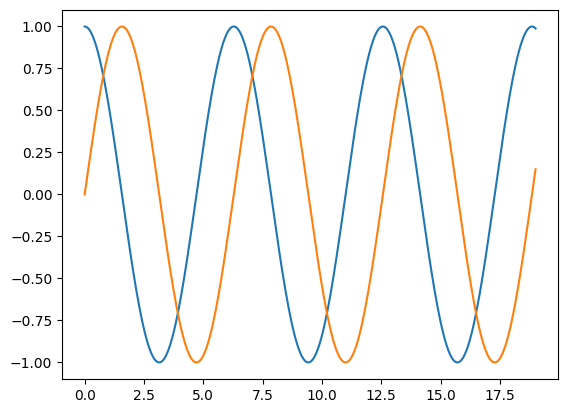

In [ ]:
import math

grafFunkce(math.cos,0,19)
grafFunkce(math.sin,0,19)

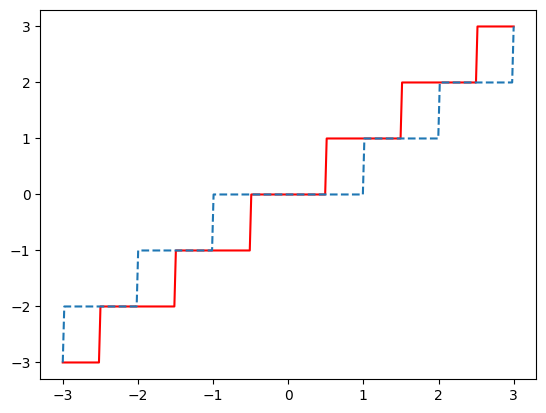

In [ ]:
# tohle je užitečné vidět

grafFunkce(round, -3, 3, color='red')
grafFunkce(int, -3, 3, linestyle='--')

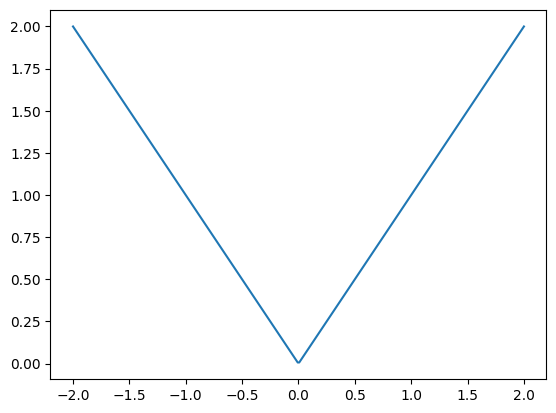

In [ ]:
# namalujte graf |x|

grafFunkce(abs, -2, 2)

### Nápověda -- Grafy funkcí dvou argumentů

Pokud chceme namalovat funkci dvou argumentů, kde jeden z nich je konstatní, máme k dispozici parametry procedury `arg2` příp. `arg1`. Viz následující příklady

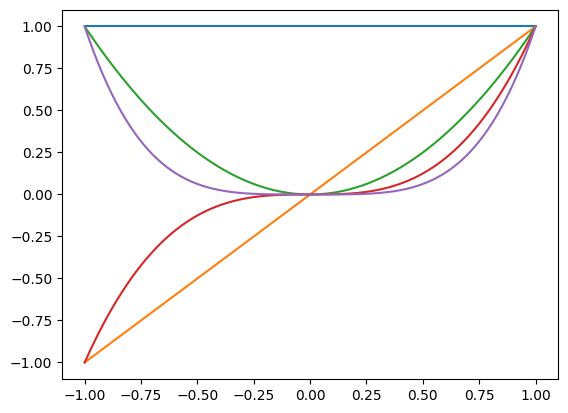

In [ ]:
# funkce math.pow má dva argumenty,
# pokud je hodnota druhého z nich konstatní,
# lze použít pojenovaný argument arg2

for n in range(5):
  grafFunkce(math.pow, -1, 1, arg2=n)  # graf x^n

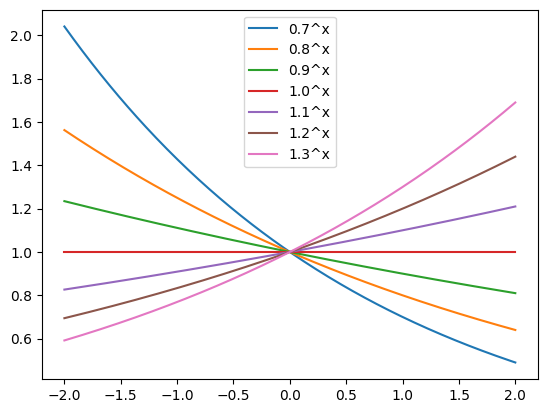

In [ ]:
for k in range(7,14):
  grafFunkce(math.pow, -2, 2, arg1=k/10, label=f"{k/10}^x")  # graf (k/10)**x

leg = plt.legend(loc='upper center')  # jen pro informaci

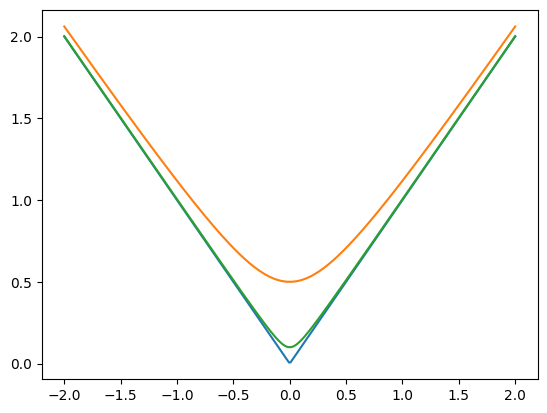

In [ ]:
# namalujte graf |x|, (a**2 + x**2)**0.5

def fce2(x,a):
  return (a**2+x**2)**0.5

grafFunkce(abs, -2, 2)
grafFunkce(fce2, -2, 2, arg2=0.5)
grafFunkce(fce2, -2, 2, arg2=0.1)

## Domácí úloha

Napište dvě funkce dané rozvoji funkce $\arctan(x)$

$$
f_n(x) = x - \frac{x^3}{3} + \frac{x^5}{5} - \frac{x^7}{7} \pm ... = \sum_{k=0}^n (-1)^k\frac{x^{2k+1}}{2k+1}
$$

$$
g_n(x) =  \frac{x}{x^2+1}+\frac{2 x^3}{3
   \left(x^2+1\right)^2}+\frac{8
   x^5}{15 \left(x^2+1\right)^3}+\frac{16 x^7}{35 \left(x^2+1\right)^4}+ ...
= \sum_{k=0}^n \frac{2^{2k} (k!)^2}{(2k + 1)!} \frac{x^{2k + 1}}{(1 + x^2)^{k + 1}}
$$

Nakreslete společný graf $\arctan(x), f_{15}(x), g_{15}(x)$ na intervalu $x\in(-1.15, 1.15)$.

V případě, že použijete gnuplot je rozumné tabelovat hodonoty společně do čtyř sloupečků
```
x_i arctan(x_i)  f15(x_i) g15(x_i)
```
a pak použít příkazy
```gnuplot
set style lines
plot "data.txt" using 1:2,  "data.txt" using 1:3, "data.txt" using 1:4
```
Pokud použijete funkci `grafFunkce`, mělo by stačit psát
```python
xmax = 1.15
grafFunkce(math.atan, -xmax, xmax)
grafFunkce(f, -xmax, xmax, arg1=15)
grafFunkce(g, -xmax, xmax, arg1=15)
```


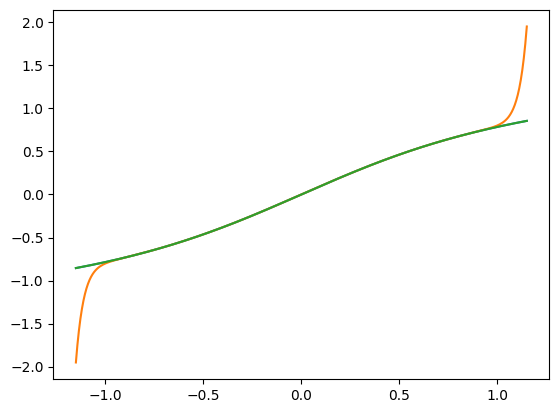

In [14]:
import math
def fn(x ,n = 15):
  fx = 0
  for i in range(n):
    fx+= (-1)**i * x**(2*i+1)/(2*i+1)
  return fx

def gn(x, n=15):
  gx = 0
  for i in range(n):
    gx += ((2**(2*i))* math.factorial(i)**2/math.factorial(2*i+1) )*( x**(2*i+1)/((1+x**2)**(i+1)))
  return gx

xmax = 1.15
grafFunkce(math.atan, -xmax, xmax)
grafFunkce(fn, -xmax, xmax, arg2=15)
grafFunkce(gn, -xmax, xmax, arg2=15)

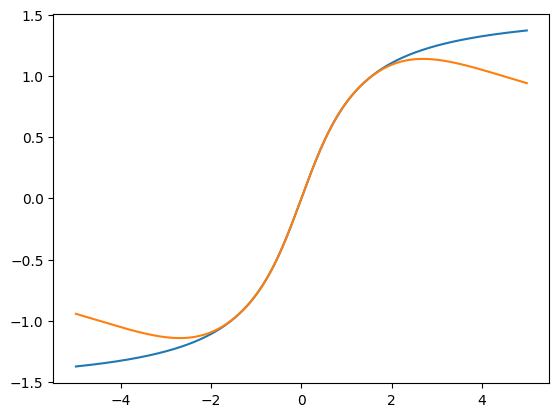

In [22]:
xmax = 5
grafFunkce(math.atan, -xmax, xmax)
#grafFunkce(fn, -xmax, xmax, arg2=15)
grafFunkce(gn, -xmax, xmax, arg2=15)